<a href="https://colab.research.google.com/github/SAIGANESH02/Wine_Quality_Prediction/blob/main/WineQualityWhite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-white.csv to winequality-white.csv


In [ ]:
!pip install tensorflow==2.0.0alpha

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("winequality-white.csv")

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
# Train test split

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3)

In [ ]:
train.shape

(3428, 12)

In [ ]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2833,7.2,0.44,0.28,3.4,0.048,22.0,112.0,0.99188,3.21,0.37,11.3,7
4529,7.3,0.26,0.53,12.7,0.047,60.5,164.5,0.99840,3.06,0.45,9.1,6
4188,5.3,0.33,0.30,1.2,0.048,25.0,119.0,0.99045,3.32,0.62,11.3,6
1654,6.6,0.46,0.49,7.4,0.052,19.0,184.0,0.99560,3.11,0.38,9.0,5
2554,6.4,0.15,0.44,1.2,0.043,67.0,150.0,0.99070,3.14,0.73,11.2,7


In [ ]:
test.shape

(1470, 12)

In [ ]:
# Normalize the data. Extremely Important
train_x = train.drop('quality', axis=1)
train_y = train['quality']
train_x=(train_x-train_x.min())/(train_x.max()-train_x.min())

test_x = test.drop('quality', axis=1)
test_y = test['quality']
test_x=(test_x-test_x.min())/(test_x.max()-test_x.min())

In [ ]:
train_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2833,0.326923,0.352941,0.168675,0.042945,0.115727,0.146520,0.288112,0.091961,0.445455,0.174419,0.532258
4529,0.336538,0.176471,0.319277,0.185583,0.112760,0.428571,0.434965,0.217660,0.309091,0.267442,0.177419
4188,0.144231,0.245098,0.180723,0.009202,0.115727,0.168498,0.307692,0.064392,0.545455,0.465116,0.532258
1654,0.269231,0.372549,0.295181,0.104294,0.127596,0.124542,0.489510,0.163678,0.354545,0.186047,0.161290
2554,0.250000,0.068627,0.265060,0.009202,0.100890,0.476190,0.394406,0.069211,0.381818,0.593023,0.516129


In [ ]:
train_y.head()

2833    7
4529    6
4188    6
1654    5
2554    7
Name: quality, dtype: int64

In [ ]:
train_y.max()

9

In [ ]:
train_y.min()

3

In [ ]:
no_features = train_x.shape[1]
no_features

11

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=[no_features]),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

In [ ]:
model.compile(optimizer='adam',loss=['mse'], 
              metrics=['mae'])

In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs['loss'] < 0.35:
            print("MSE less than 0.35. No futher training required. Otherwise \
                  data will overfit")
            self.model.stop_training = True

In [ ]:
callbacks = MyCallback()

In [ ]:
history = model.fit(train_x, train_y, epochs=500, callbacks=[callbacks])

Epoch 1/500
108/108 [==============================] - 2s 2ms/step - loss: 17.1084 - mae: 3.5561
Epoch 2/500
108/108 [==============================] - 0s 2ms/step - loss: 0.8751 - mae: 0.7316
Epoch 3/500
108/108 [==============================] - 0s 2ms/step - loss: 0.7997 - mae: 0.6920
Epoch 4/500
108/108 [==============================] - 0s 2ms/step - loss: 0.7569 - mae: 0.6752
Epoch 5/500
108/108 [==============================] - 0s 2ms/step - loss: 0.7034 - mae: 0.6589
Epoch 6/500
108/108 [==============================] - 0s 2ms/step - loss: 0.6869 - mae: 0.6463
Epoch 7/500
108/108 [==============================] - 0s 2ms/step - loss: 0.6897 - mae: 0.6432
Epoch 8/500
108/108 [==============================] - 0s 2ms/step - loss: 0.6867 - mae: 0.6450
Epoch 9/500
108/108 [==============================] - 0s 2ms/step - loss: 0.6398 - mae: 0.6262
Epoch 10/500
108/108 [==============================] - 0s 2ms/step - loss: 0.6069 - mae: 0.6064
Epoch 11/500
108/108 [================

Text(0.5, 0, 'Epochs')

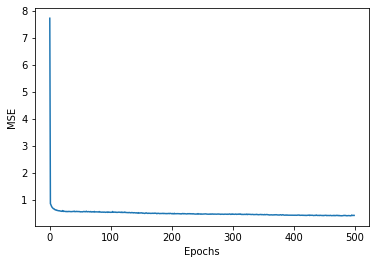

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history['loss'])
plt.ylabel('MSE')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

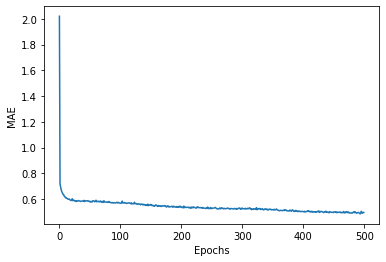

In [ ]:
plt.plot(history.epoch, history.history['mae'])
plt.ylabel('MAE')
plt.xlabel('Epochs')

In [ ]:
test_mse, test_mae = model.evaluate(test_x, test_y)

46/46 [==============================] - 0s 2ms/step - loss: 2.8790 - mae: 1.4289


In [ ]:
test_mse

2.8790276050567627

In [ ]:
test_mae

1.4289387464523315

In [ ]:
train.to_csv('white_wine_train_data.csv',index=None)

In [ ]:
test.to_csv('white_wine_test_data.csv',index=None)

In [ ]:
tf.saved_model.save(model, 'white_wine_saved_model')